#Task Details
An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

##Expected Submission
Submissions should be made in the same format as the Sample Notebook provided. Train/Test split should be 80% for training & 20% for testing.

##About Data
ID: Id of the user(All Unique)

Income: Income of the user

Age: Age of the user

Experience: Professional experience of the user in years

Profession: Profession of the user

Married/Single: Whether married or not

House_Ownership: Owned or rented or neither

Car_Ownership: Does the person own a car

STATE: State of residence

CITY: City of residence

CURRENT_JOB_YRS: Years of experience in the current job

CURRENT_HOUSE_YRS: Number of years in the current residence

Risk_Flag: Defaulted on a loan(Target variable)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv("Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop("Id", axis=1)

In [ ]:
numerical_features = df.select_dtypes(include=("int64")).columns
numerical_features

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

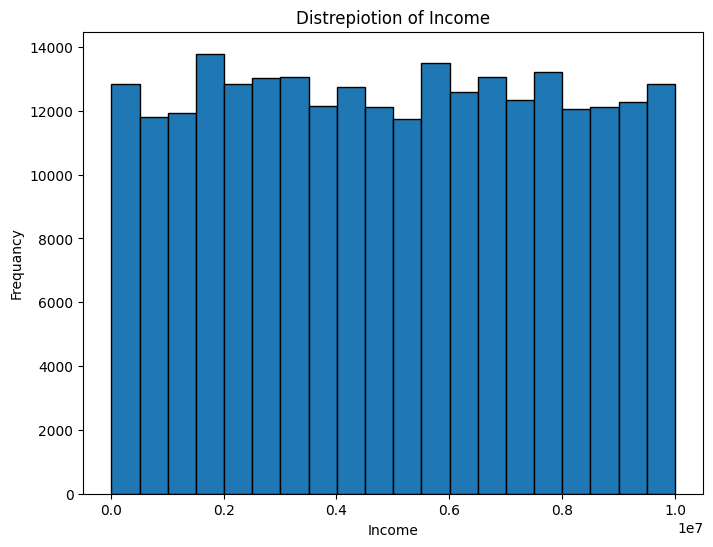

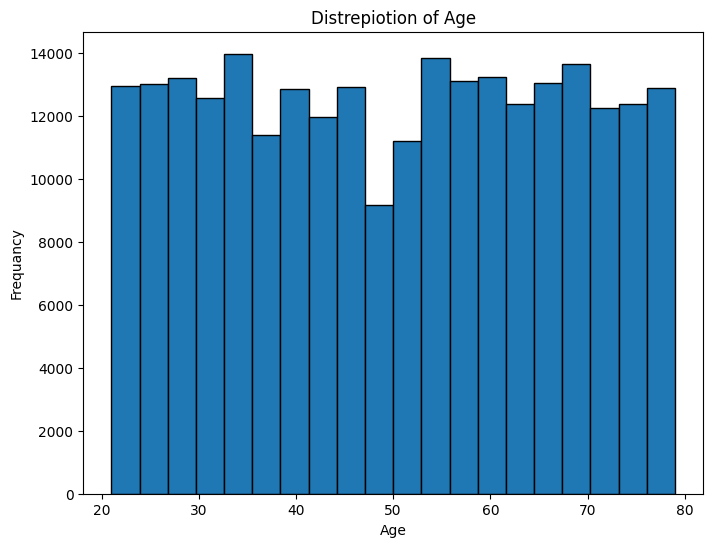

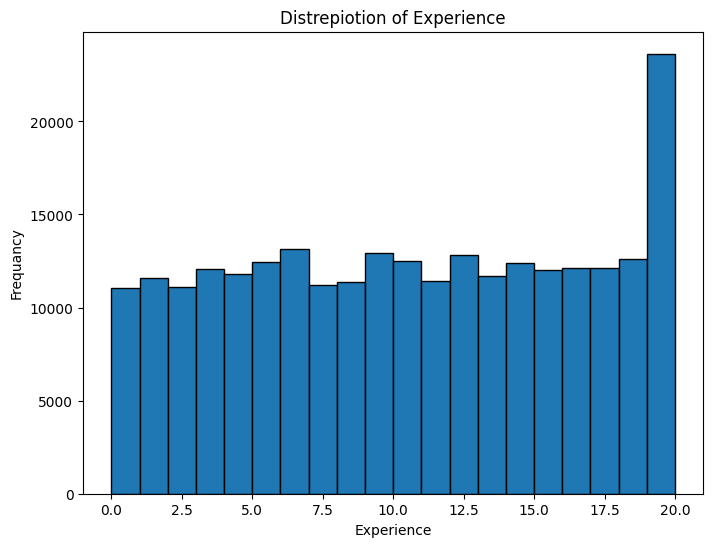

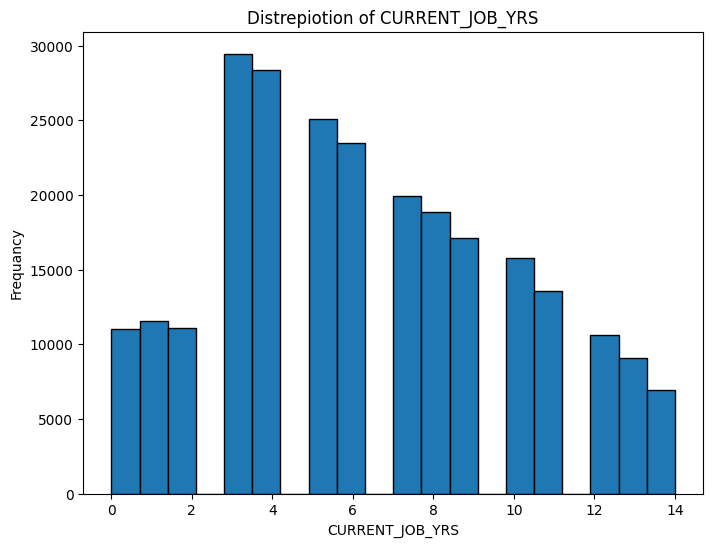

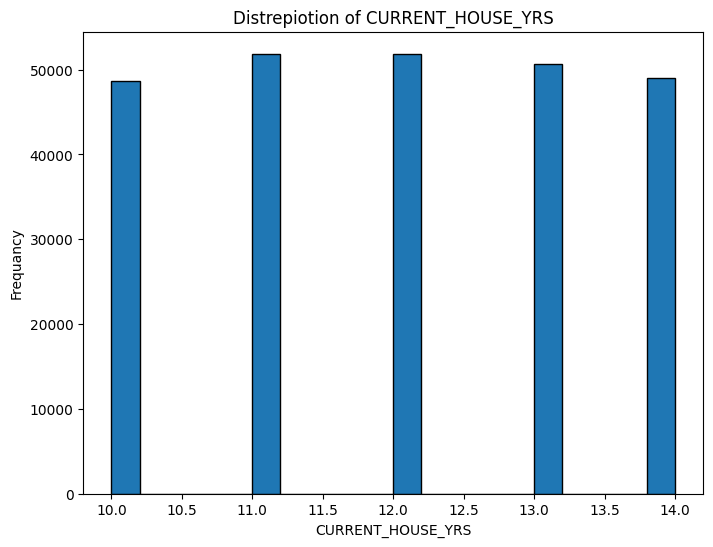

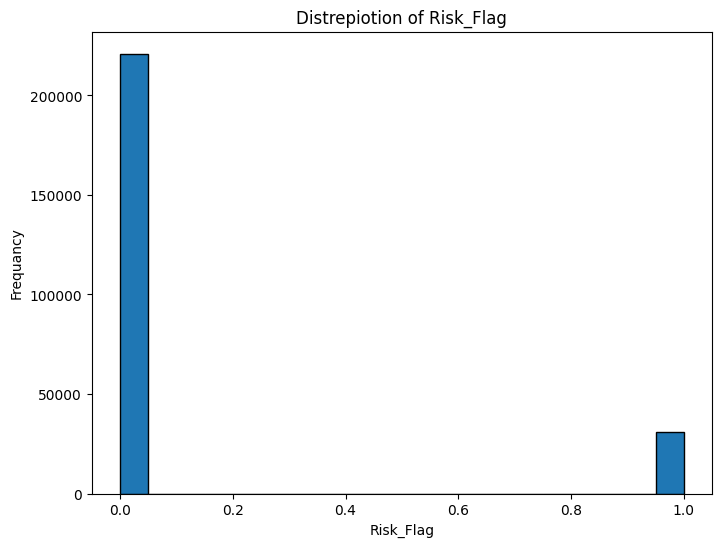

In [ ]:
for i in numerical_features:
  plt.figure(figsize=(8,6))
  plt.hist(df[i], bins=20, edgecolor="black")
  plt.xlabel(i)
  plt.ylabel("Frequancy")
  plt.title(f"Distrepiotion of {i}")
  plt.show()

In [ ]:
# income and age are normal distribution

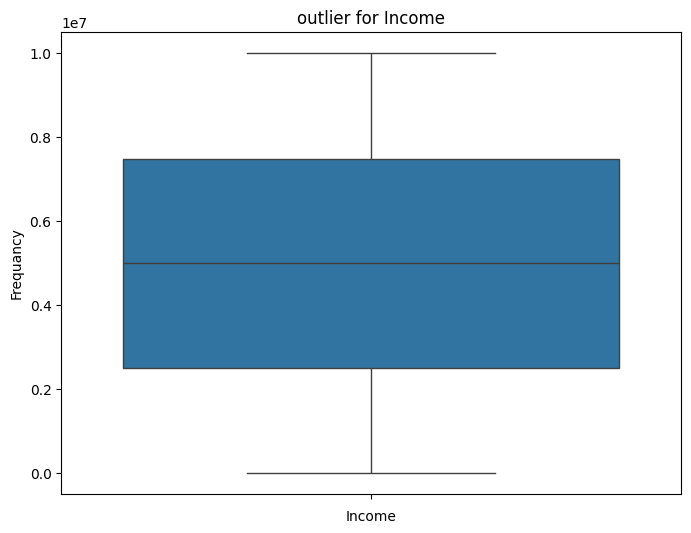

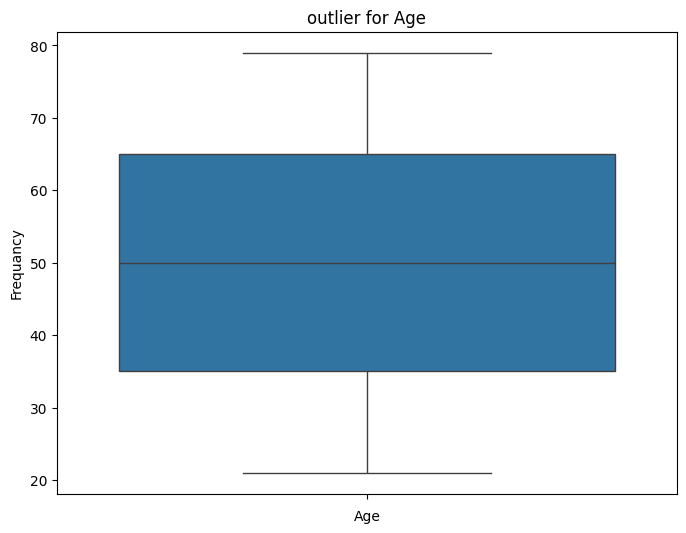

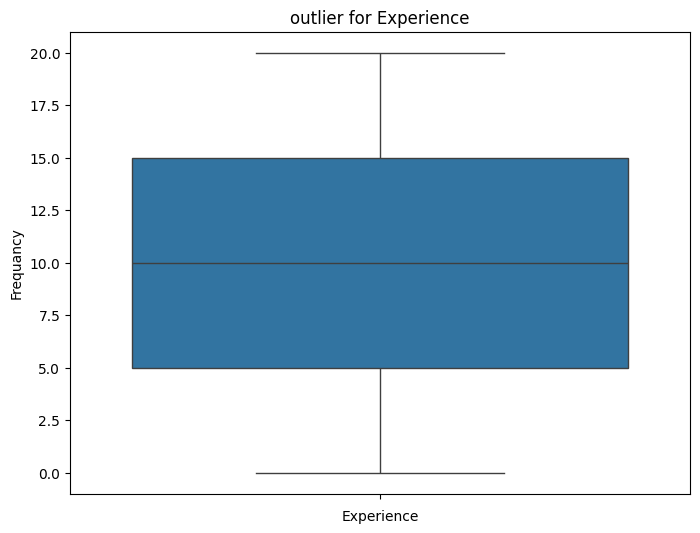

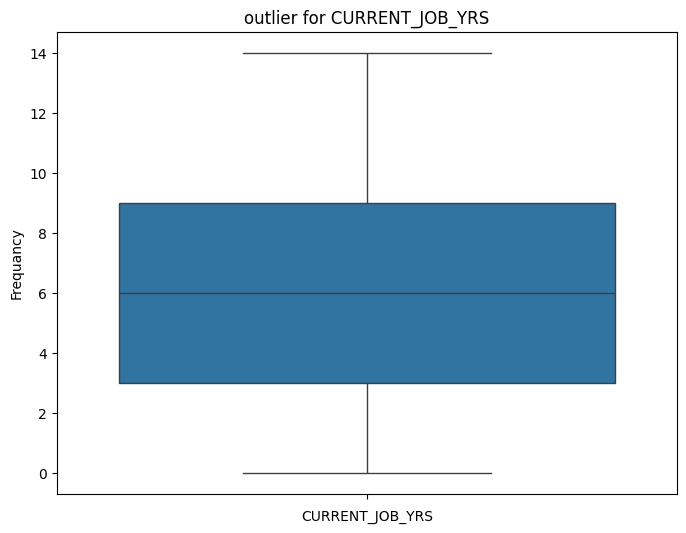

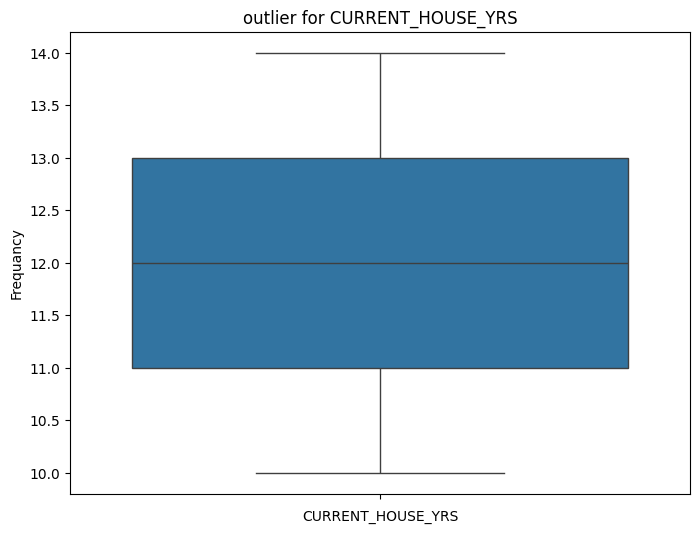

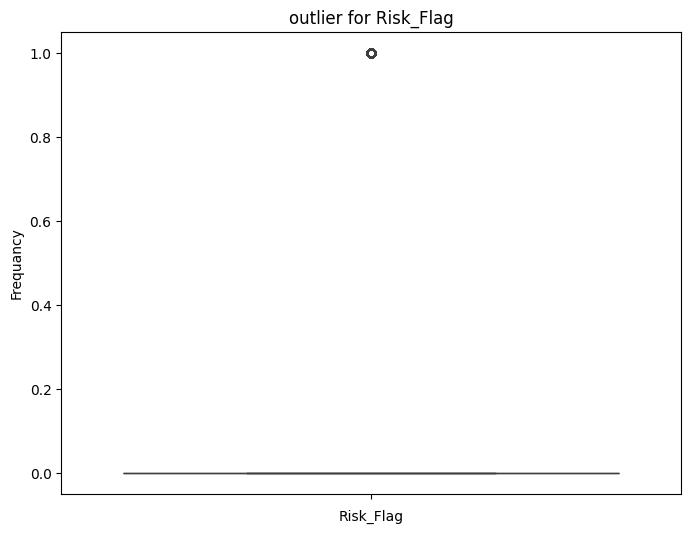

In [ ]:
for i in numerical_features:
  plt.figure(figsize=(8,6))
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.ylabel("Frequancy")
  plt.title(f"outlier for {i}")
  plt.show()

In [ ]:
# There are no outliers in datasets. But we need to scale Age and Income

In [ ]:
corr_numerical = df[numerical_features].corr()
corr_numerical

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


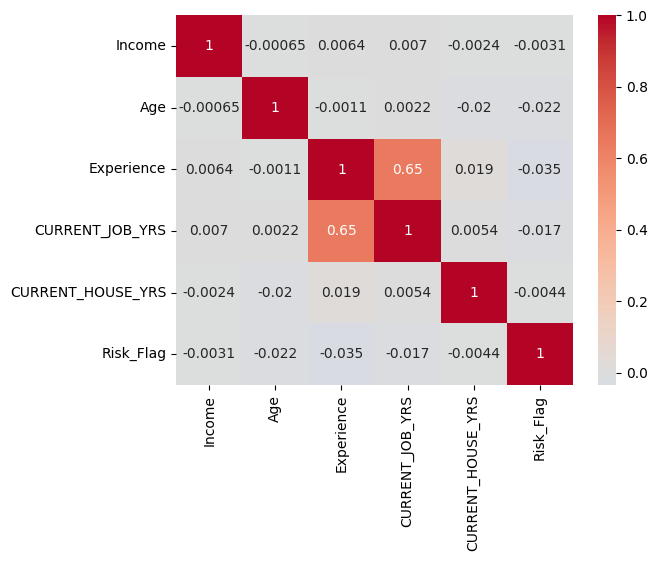

In [ ]:
sns.heatmap(corr_numerical, annot=True, cmap="coolwarm", center=0)
plt.show()

In [ ]:
# Strong correlation between Experience and CURRENT_JOB_YRS

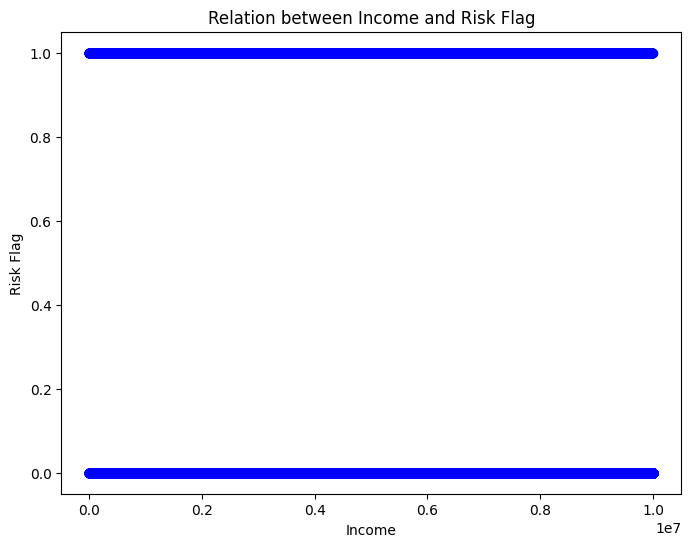

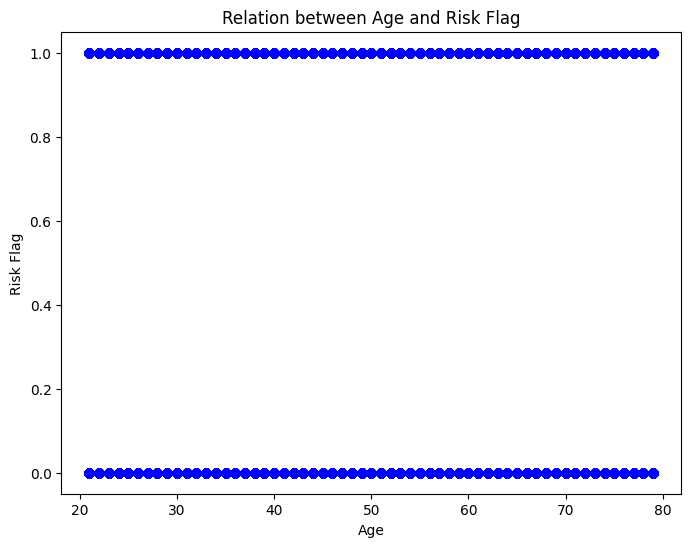

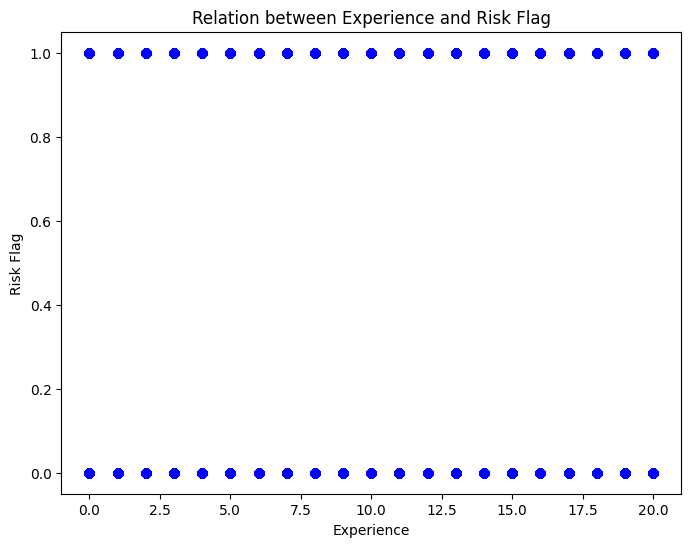

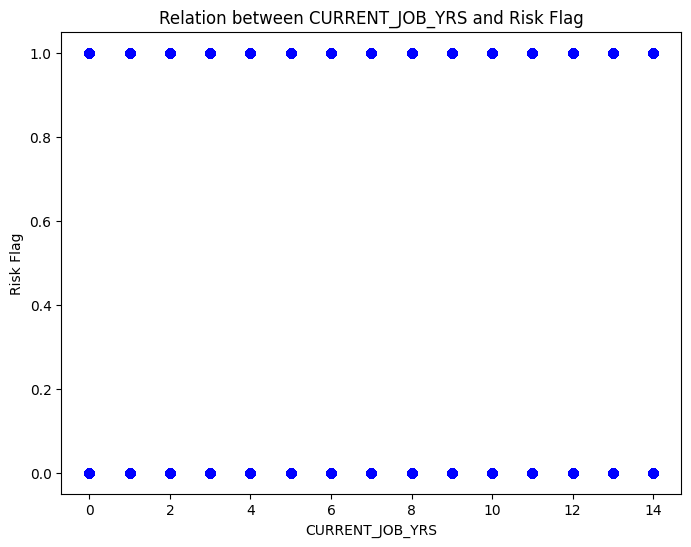

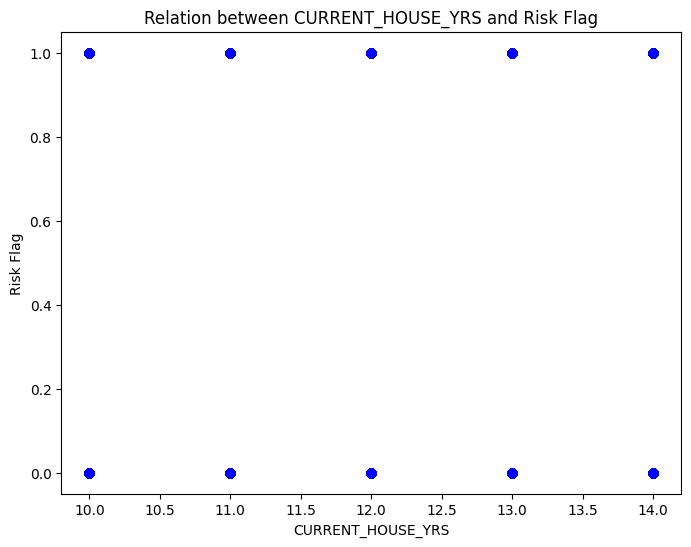

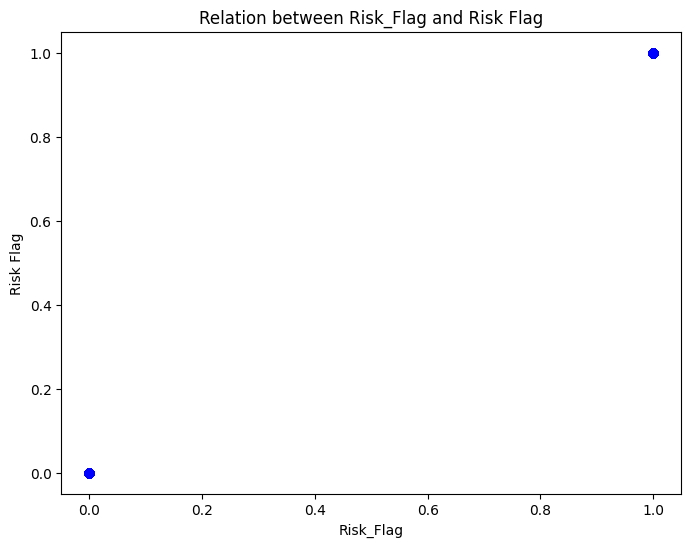

In [ ]:
for i in numerical_features:
  plt.figure(figsize=(8,6))
  plt.scatter(df[i], df["Risk_Flag"], c="blue", marker="o")
  plt.xlabel(i)
  plt.ylabel("Risk Flag")
  plt.title(f"Relation between {i} and Risk Flag")
  plt.show()

In [ ]:
# there is no linear regression relation between numerical features and target

In [ ]:
categorical_features  = df.select_dtypes(include="object").columns
categorical_features

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

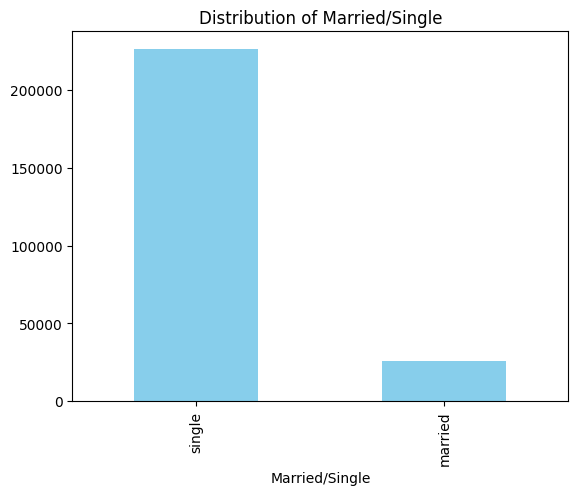

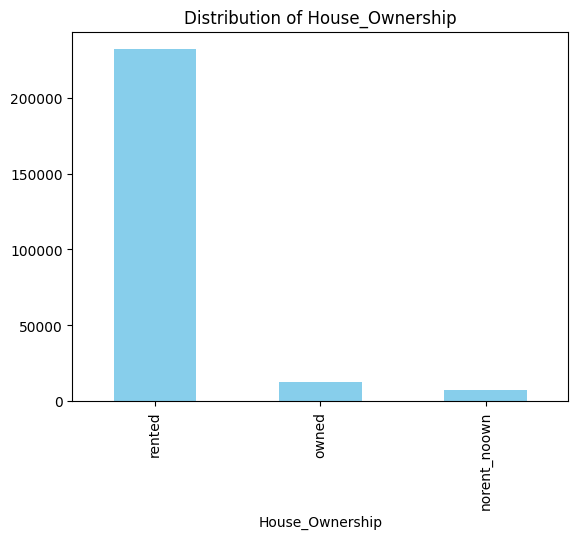

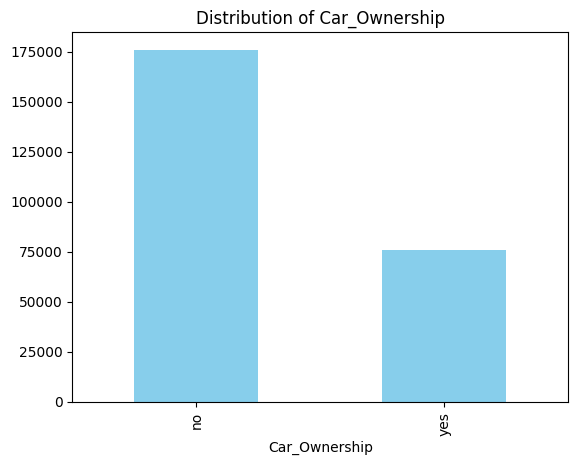

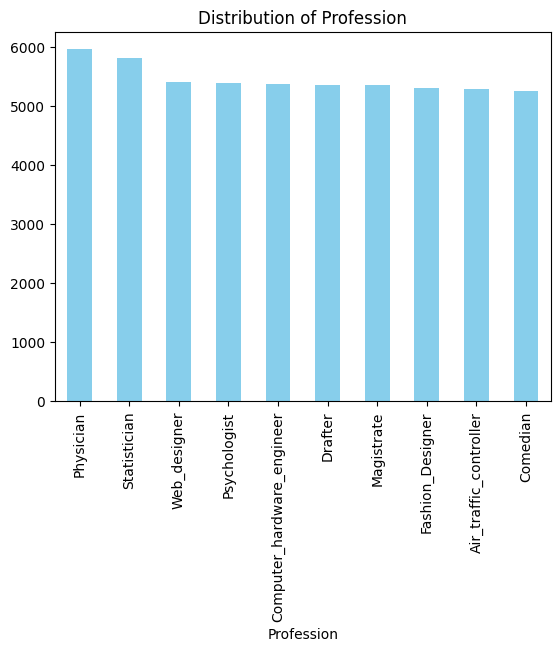

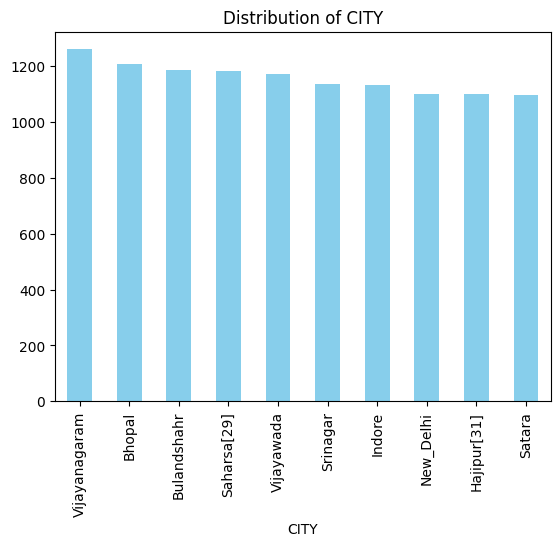

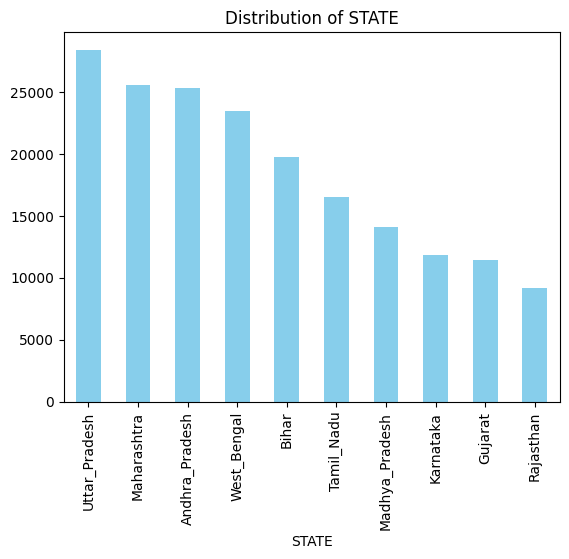

In [ ]:
for i in categorical_features:
  count = df[i].value_counts()[:10]
  count.plot(kind="bar", color="skyblue")
  plt.title(f"Distribution of {i}")
  plt.show()

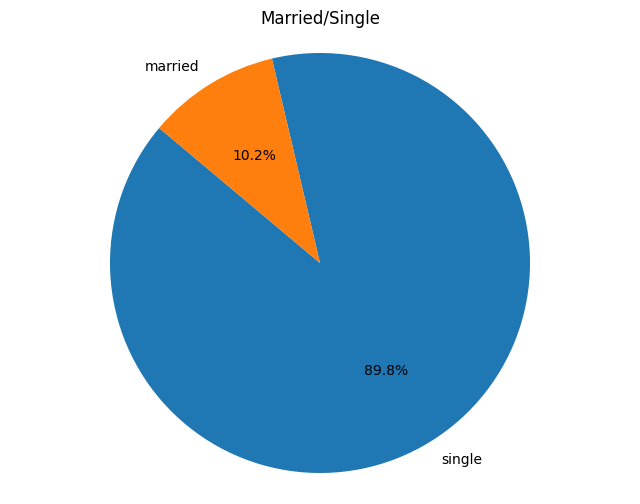

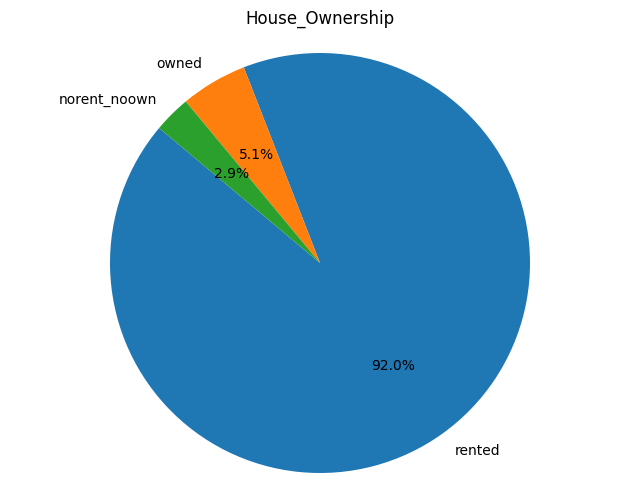

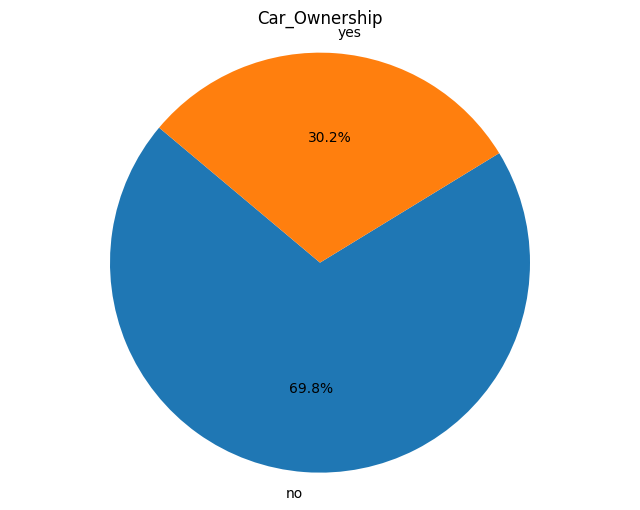

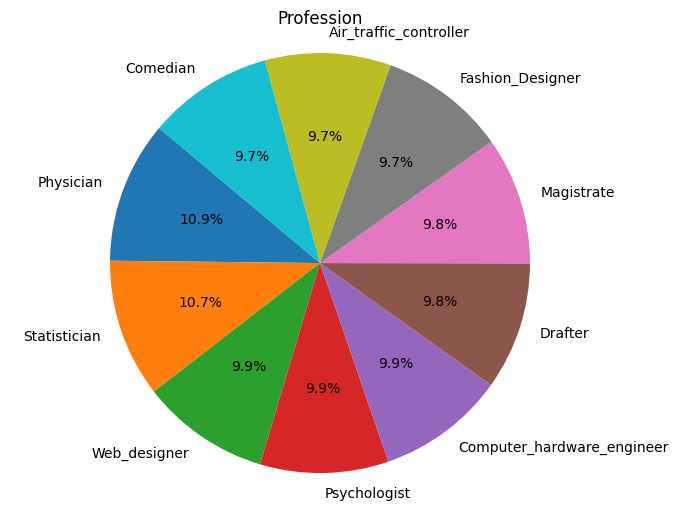

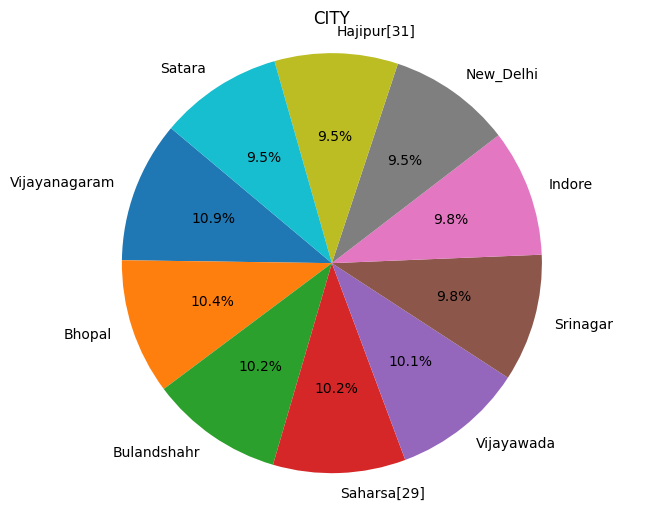

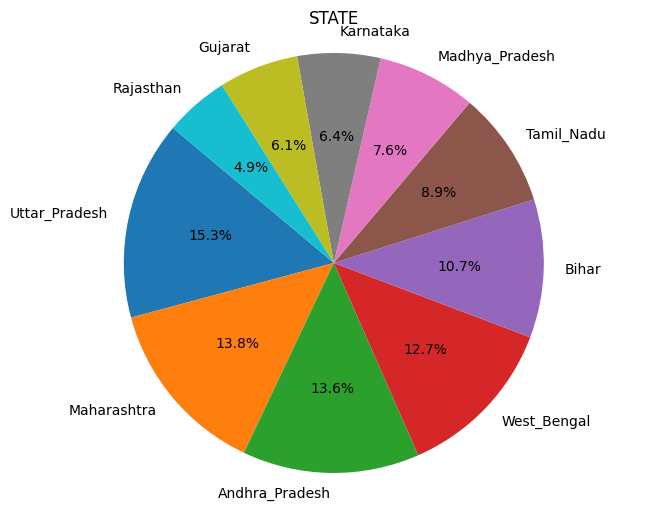

In [ ]:
for i in categorical_features:
  count = df[i].value_counts()[:10]
  plt.figure(figsize=(8,6))
  plt.pie(count, labels=count.index, autopct="%1.1f%%", startangle=140)
  plt.axis("equal")
  plt.title(i)
  plt.show()

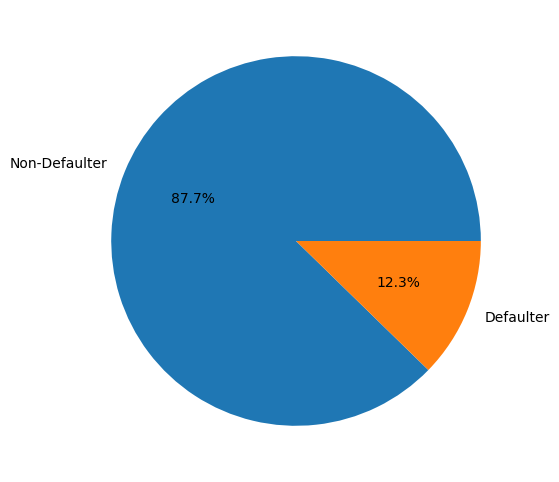

In [ ]:
risk_flag_count = df["Risk_Flag"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(risk_flag_count, labels=['Non-Defaulter', 'Defaulter'], autopct="%1.1f%%")
plt.show()

In [ ]:
# Class 0 represents 88.00% of the dataset, while class 1 only 12.00%. The classes are heavily skewed we need to solve this issue

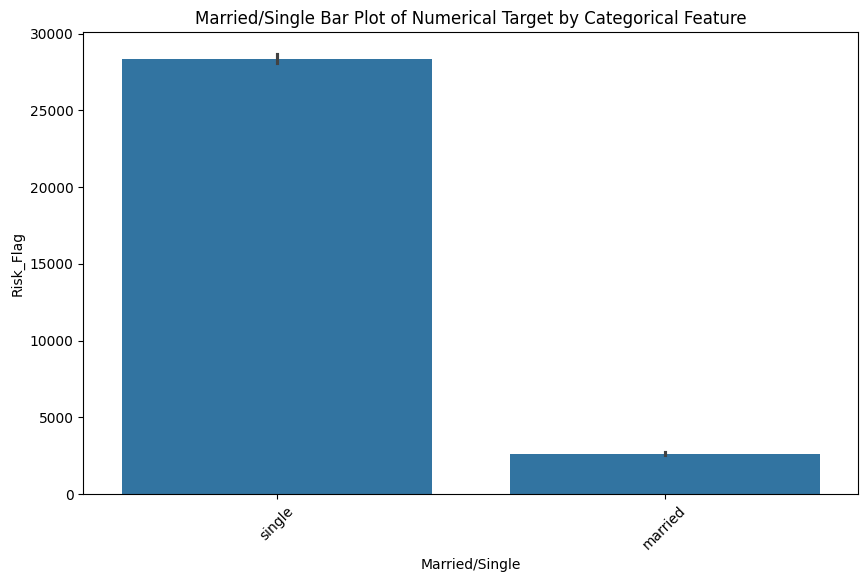

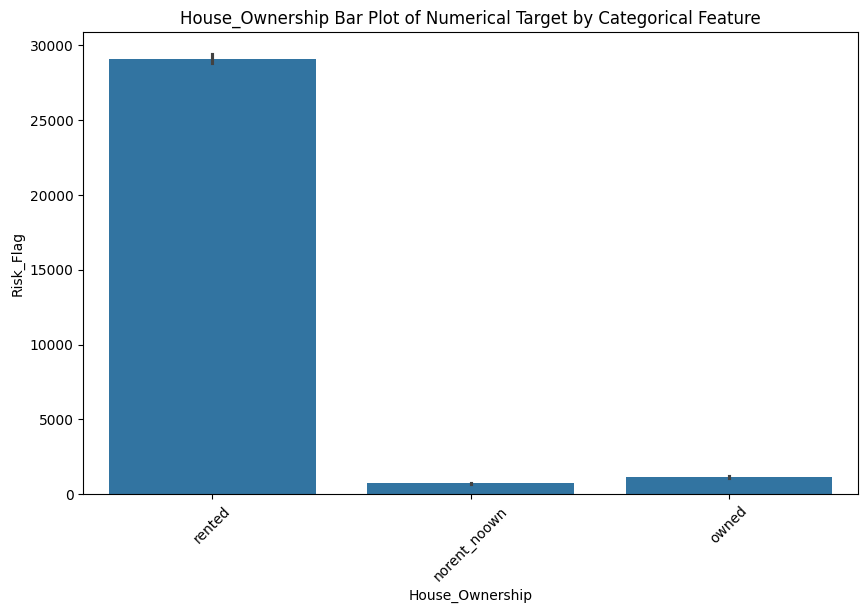

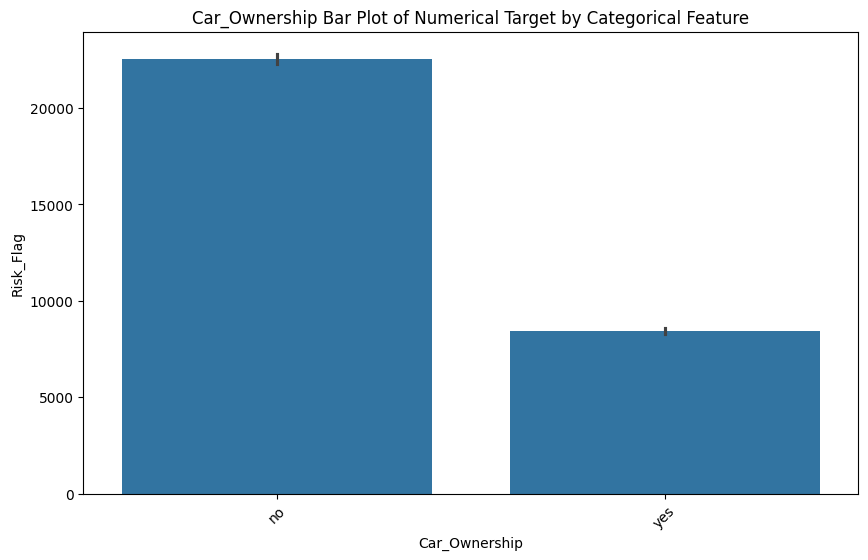

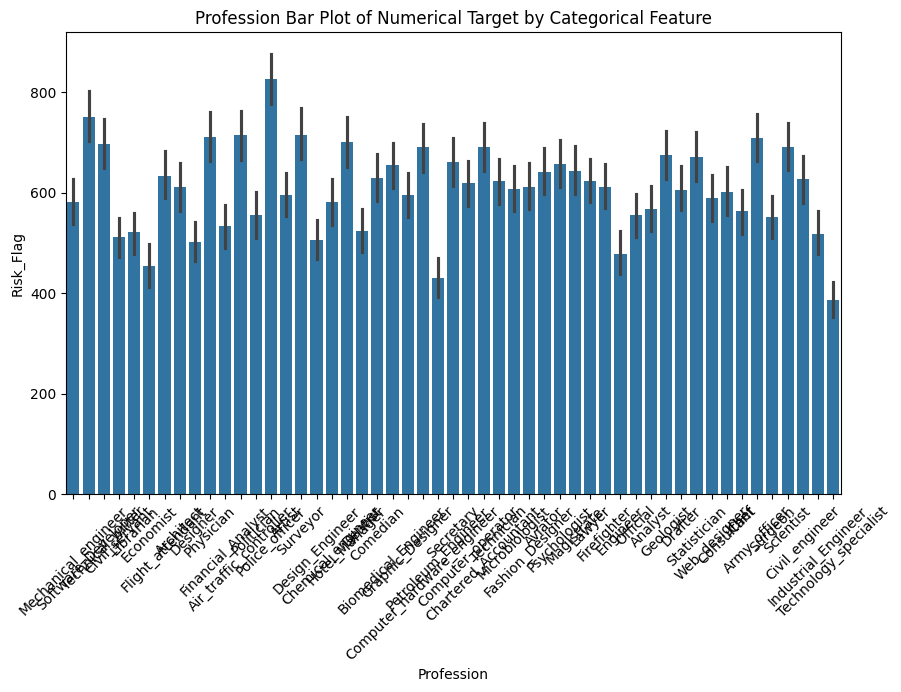

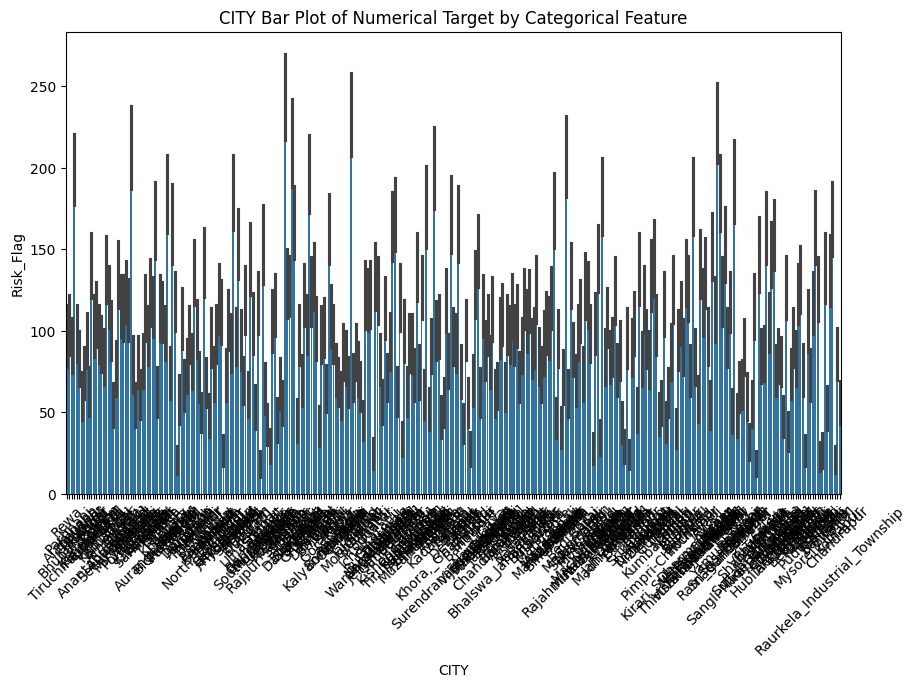

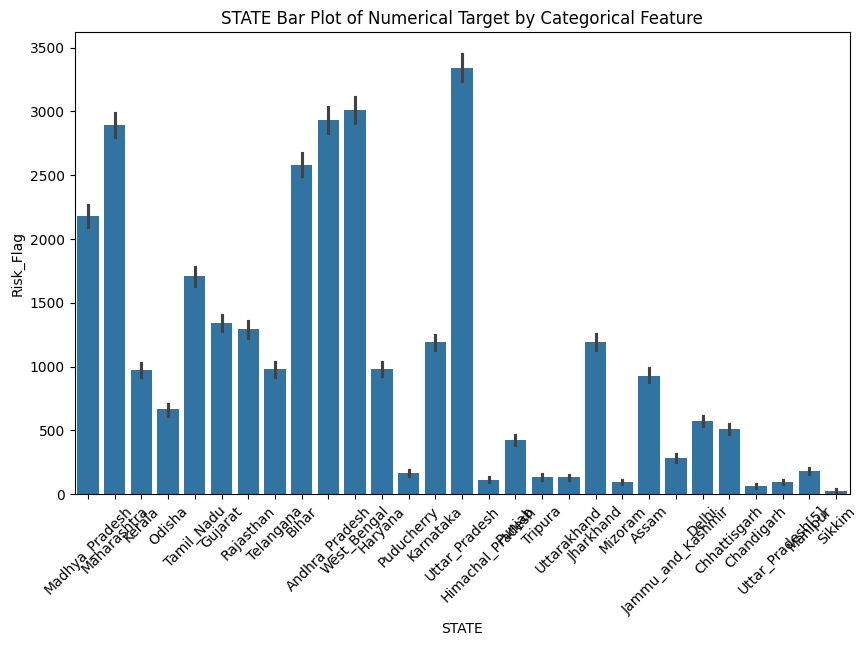

In [ ]:
for i in categorical_features:
  plt.figure(figsize=(10, 6))
  sns.barplot(x=i, y="Risk_Flag", data=df, estimator=sum)
  plt.title(f"{i} Bar Plot of Numerical Target by Categorical Feature")
  plt.xticks(rotation=45)
  plt.show()


# Summary on Data Visualization

1. income and age are normal distribution (Need scalling)
2. There are no outliers in datasets. But we need to scale Age and Income
3. there is no linear regression relation between numerical features and target
4. Class 0 represents 88.00% of the dataset, while class 1 only 12.00%. The classes are heavily skewed we need to solve this issue
5. Strong correlation between Experience and CURRENT_JOB_YRS
6. Married/Single Car_Ownership profession city state can be label encoder
7. House_Ownership hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(dataframe):
  categorical_col = ["House_Ownership"]
  encoder = OneHotEncoder(sparse=False)
  encoder_data = encoder.fit_transform(dataframe[categorical_col])
  encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(categorical_col))
  result = pd.concat([dataframe.drop(categorical_col, axis= 1).reset_index(drop=True), encoder_df], axis=1)
  return result

df_encoded = one_hot_encoder(df)
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,single,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.0,0.0,1.0
1,7574516,40,10,single,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.0,0.0,1.0
2,3991815,66,4,married,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.0,0.0,1.0
3,6256451,41,2,single,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.0,0.0,1.0
4,5768871,47,11,single,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,no,Surgeon,Kolkata,West_Bengal,6,11,0,0.0,0.0,1.0
251996,2843572,26,10,single,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,0.0,0.0,1.0
251997,4522448,46,7,single,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0.0,0.0,1.0
251998,6507128,45,0,single,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe):
  le = LabelEncoder()
  for col in ["Married/Single","Car_Ownership", "Profession", "CITY", "STATE"]:
    dataframe[col] = le.fit_transform(dataframe[col])

  return dataframe

df_encoded = label_encoder(df_encoded)
df_encoded

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,1,0,33,251,13,3,13,0,0.0,0.0,1.0
1,7574516,40,10,1,0,43,227,14,9,13,0,0.0,0.0,1.0
2,3991815,66,4,0,0,47,8,12,4,10,0,0.0,0.0,1.0
3,6256451,41,2,1,1,43,54,17,2,12,1,0.0,0.0,1.0
4,5768871,47,11,1,0,11,296,22,3,14,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,0,45,162,28,6,11,0,0.0,0.0,1.0
251996,2843572,26,10,1,0,3,251,13,6,11,0,0.0,0.0,1.0
251997,4522448,46,7,1,0,17,144,14,7,12,0,0.0,0.0,1.0
251998,6507128,45,0,1,0,27,233,18,0,10,0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(["Risk_Flag"], axis=1)
y = df_encoded["Risk_Flag"]
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.2, random_state=2024, stratify= y)

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_scaled = ["Income","Age"]

scaler = StandardScaler()
scaler.fit(X_train[numerical_scaled])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_scaled] = scaler.transform(X_train[numerical_scaled])
X_test_scaled[numerical_scaled] = scaler.transform(X_test[numerical_scaled])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = lr_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test,y_pred))

Test Accuracy: 0.12300099206349206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    176803
           1       0.12      1.00      0.22     24797

    accuracy                           0.12    201600
   macro avg       0.06      0.50      0.11    201600
weighted avg       0.02      0.12      0.03    201600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors= 5)

kn_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = kn_model.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test,y_pred))

Test Accuracy: 0.8659623015873016
Classification report
               precision    recall  f1-score   support

           0       0.95      0.90      0.92    176803
           1       0.47      0.63      0.54     24797

    accuracy                           0.87    201600
   macro avg       0.71      0.76      0.73    201600
weighted avg       0.89      0.87      0.87    201600



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = rf_model.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test,y_pred))

Test Accuracy: 0.8791369047619048
Classification report
               precision    recall  f1-score   support

           0       0.96      0.90      0.93    176803
           1       0.51      0.71      0.59     24797

    accuracy                           0.88    201600
   macro avg       0.73      0.81      0.76    201600
weighted avg       0.90      0.88      0.89    201600



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

stump = DecisionTreeClassifier(max_depth=1)

ada_boost_dt = AdaBoostClassifier(base_estimator=stump, n_estimators=50, random_state=2024)

ada_boost_dt.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions
y_pred = ada_boost_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Accuracy: 0.5845386904761904
Classification report
               precision    recall  f1-score   support

           0       0.89      0.60      0.72    176803
           1       0.14      0.46      0.21     24797

    accuracy                           0.58    201600
   macro avg       0.51      0.53      0.47    201600
weighted avg       0.80      0.58      0.66    201600



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = model_GBC.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test,y_pred))

Test Accuracy: 0.6233134920634921
Classification report
               precision    recall  f1-score   support

           0       0.90      0.64      0.75    176803
           1       0.16      0.48      0.24     24797

    accuracy                           0.62    201600
   macro avg       0.53      0.56      0.50    201600
weighted avg       0.81      0.62      0.69    201600



#Conclusion
Random Forest Classifier is the best suitable model for our dataset with accuracy 87% and

Class----precision - recall --- f1-score


0-----------0.89---------0.60---------0.72    
1-----------0.14---------0.46---------0.21    